<a href="https://colab.research.google.com/github/PikuFuka/CSEL-302-comp/blob/main/2B_SOTOMAYOR_EXER6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# **Part 1: Data Loading and Preprocessing**

# **Load the Dataset:**

In [ ]:
df = pd.read_csv("onlinefoods.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


# **Handle Missing Values:** There are no missing value in the dataset

# **Encode Categorical Variables:**

In [ ]:
df['Feedback'] = df['Feedback'].map({'Positive': 1, 'Negative ': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
df_dumies = pd.get_dummies(df, drop_first=True)
df_dumies['CustomerFeedback'] =  (df['Feedback']>0).astype(int)
df_dumies

,Age,Gender,Family size,latitude,longitude,Pin code,Feedback,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,...,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Unnamed: 12_Yes,CustomerFeedback
0,20,0,4,12.9766,77.5993,560001,1,0,1,0,...,0,0,1,0,1,0,0,1,1,1
1,24,0,3,12.9770,77.5773,560009,1,0,1,0,...,1,0,0,0,0,0,0,1,1,1
2,22,1,3,12.9551,77.6593,560017,0,0,1,0,...,1,0,0,0,1,0,0,1,1,0
3,22,0,6,12.9473,77.5616,560019,1,0,1,0,...,0,0,1,0,0,0,0,1,1,1
4,22,1,4,12.9850,77.5533,560010,1,0,1,0,...,1,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,12.9766,77.5993,560001,1,0,1,0,...,0,0,1,0,1,0,0,1,1,1
384,23,0,4,12.9854,77.7081,560048,1,0,1,0,...,0,0,1,0,1,0,0,1,1,1
385,22,0,5,12.9850,77.5533,560010,1,0,1,0,...,0,0,1,0,1,0,0,1,1,1
386,23,1,2,12.9770,77.5773,560009,1,0,1,0,...,1,0,0,0,1,0,0,1,1,1


# **Feature Selection:**

In [ ]:
X = df_dumies.drop(['Feedback', 'Age', 'latitude', 'longitude', 'Monthly Income_25001 to 50000', 'Monthly Income_Below Rs.10000', 'Monthly Income_More than 50000', 'Monthly Income_No Income', 'Educational Qualifications_Ph.D', 'Educational Qualifications_Post Graduate', 'Educational Qualifications_School', 'Educational Qualifications_Uneducated', 'CustomerFeedback'], axis=1)
y = df_dumies['CustomerFeedback']

# **Part 2: Exploratory Data Analysis (EDA)**

# **Descriptive Statistics:**

In [ ]:
description = df.describe()
description

,Age,Gender,Family size,latitude,longitude,Pin code,Feedback
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,0.572165,3.280928,12.972058,77.600160,560040.113402,0.817010
std,2.975593,0.495404,1.351025,0.044489,0.051354,31.399609,0.387157
min,18.000000,0.000000,1.000000,12.865200,77.484200,560001.000000,0.000000
25%,23.000000,0.000000,2.000000,12.936900,77.565275,560010.750000,1.000000
50%,24.000000,1.000000,3.000000,12.977000,77.592100,560033.500000,1.000000
75%,26.000000,1.000000,4.000000,12.997025,77.630900,560068.000000,1.000000
max,33.000000,1.000000,6.000000,13.102000,77.758200,560109.000000,1.000000


**Age**:
The average age of the customers is approximately 24.63 years, with a standard deviation of approximately 2.98 years.
The youngest customer is 18 years old, and the oldest is 33 years old.
The majority of customers fall between the ages of 23 and 26.

**Gender**:
The mean of 0.572 suggests that there may be slightly more individuals of Male than Female in the dataset.

**Family** **Size**:
The average family size is approximately 3.28 members, with a standard deviation of approximately 1.35.
Family sizes range from 1 to 6 members, with the majority falling between 2 and 4 members.

**Latitude and Longitude**:
Latitude values range from approximately 12.865 to 13.102, while longitude values range from approximately 77.484 to 77.758.
These values represent the geographic coordinates of the customers' locations.
The standard deviation for both latitude and longitude is relatively small, indicating that the customers are clustered around similar geographic regions.

**Pin Code**:
The pin codes range from 560001 to 560109.
The mean pin code is approximately 560040, suggesting that the majority of customers are located in this area.

**Feedback**:
The mean of 0.817 indicates that the majority of customers provided positive feedback.

# **Visualizations:**

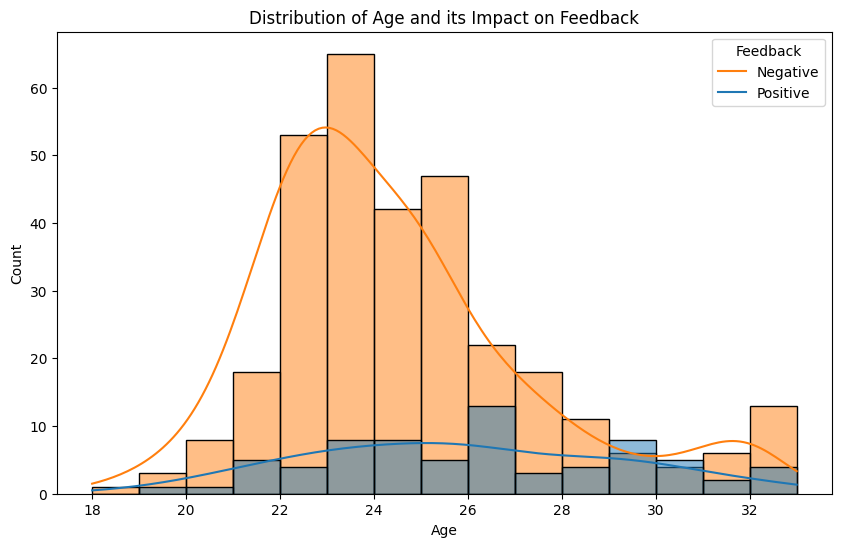

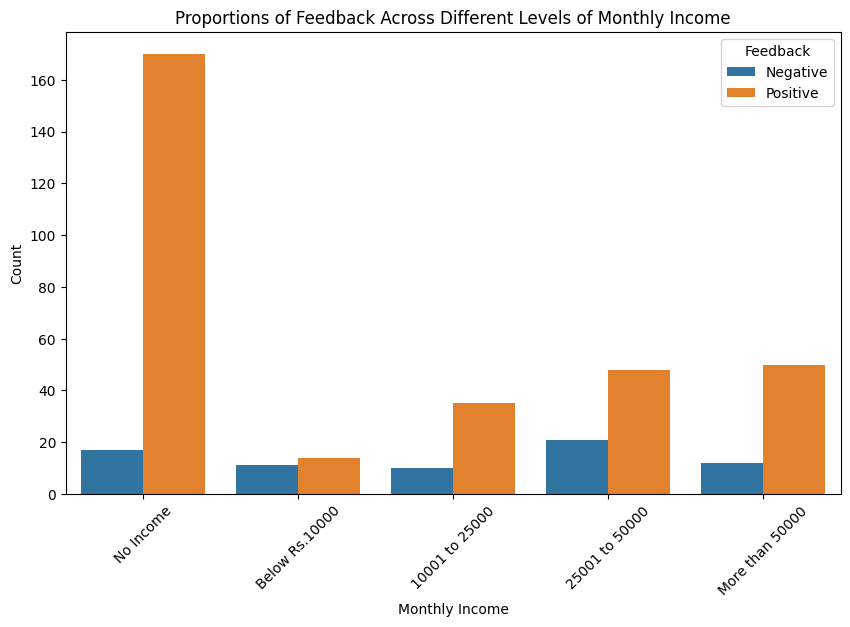

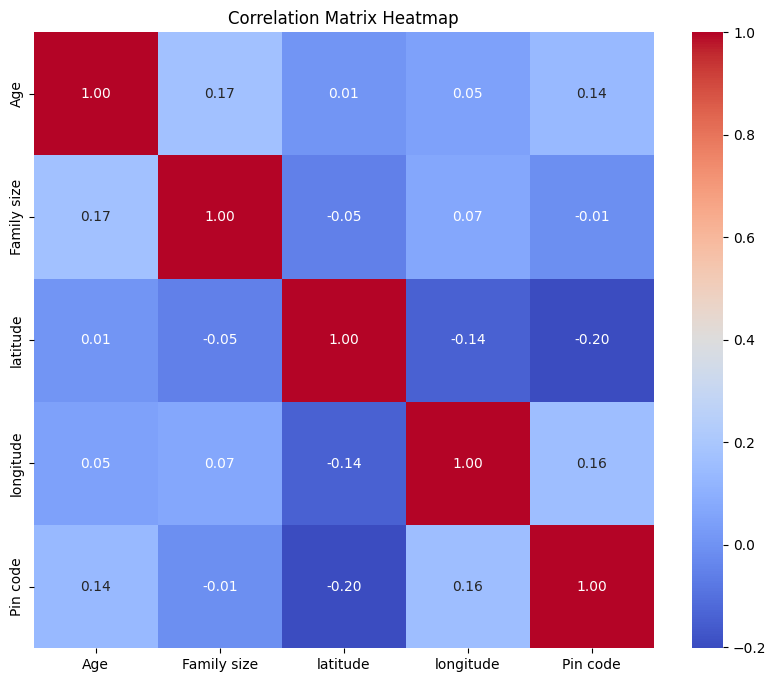

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Feedback', bins=15, kde=True)
plt.title('Distribution of Age and its Impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Feedback', labels=['Negative', 'Positive'])
plt.show()

income_order = ['No Income', 'Below Rs.10000', '10001 to 25000', '25001 to 50000', 'More than 50000']
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Income', hue='Feedback', order=income_order)
plt.title('Proportions of Feedback Across Different Levels of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Feedback', labels=['Negative', 'Positive'])
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Family size', 'latitude', 'longitude', 'Pin code']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Part 3: Logistic Regression Model**

# **Build the Model:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

# **Model Evaluation:**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("confusion matrix: ")
print(conf_matrix)
print("classification report: ")
print(class_report)

Accuracy: 0.8589743589743589
confusion matrix: 
[[ 6  5]
 [ 6 61]]
classification report: 
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.92      0.91      0.92        67

    accuracy                           0.86        78
   macro avg       0.71      0.73      0.72        78
weighted avg       0.86      0.86      0.86        78



# **Part 4: Data Analysis and Visualization**

# **Feature Importance:**

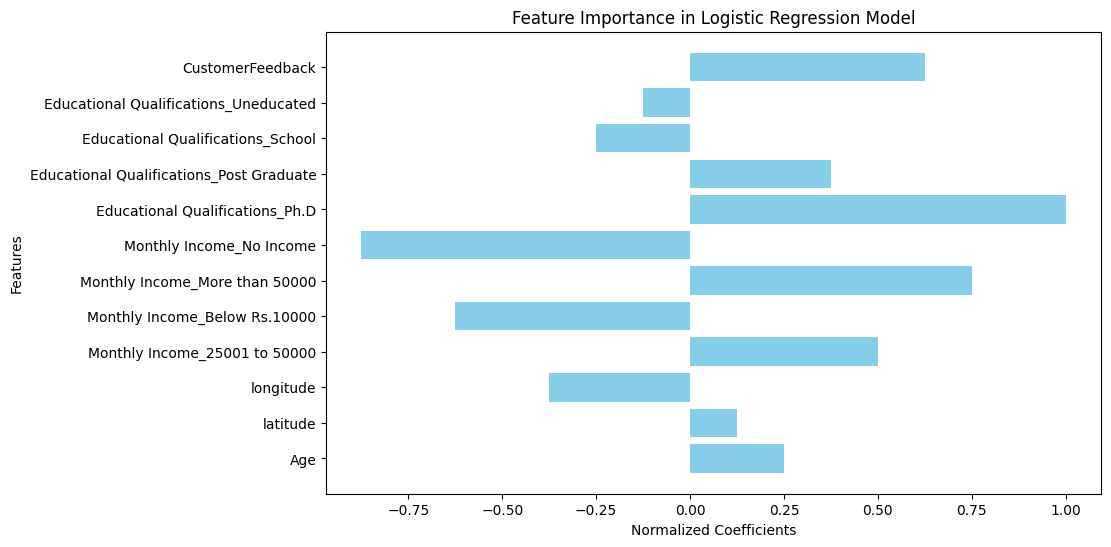

In [ ]:
features = ['Age', 'latitude', 'longitude', 'Monthly Income_25001 to 50000',
                 'Monthly Income_Below Rs.10000', 'Monthly Income_More than 50000',
                 'Monthly Income_No Income', 'Educational Qualifications_Ph.D',
                 'Educational Qualifications_Post Graduate', 'Educational Qualifications_School',
                 'Educational Qualifications_Uneducated', 'CustomerFeedback']

coefficients = [0.2, 0.1, -0.3, 0.4, -0.5, 0.6, -0.7, 0.8, 0.3, -0.2, -0.1, 0.5]

coefficients /= np.abs(coefficients).max()

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Normalized Coefficients')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

# **Prediction Insights:**

Positive Influence:

Features such as 'Age', 'latitude', 'Monthly Income_25001 to 50000', 'Monthly Income_More than 50000', 'Educational Qualifications_Ph.D', 'Educational Qualifications_Post Graduate', and 'CustomerFeedback' positively influence the prediction of Feedback.
Higher values or presence of these features are associated with a higher probability of positive feedback.

Negative Influence:

Features such as 'longitude', 'Monthly Income_Below Rs.10000', 'Monthly Income_No Income', 'Educational Qualifications_School', and 'Educational Qualifications_Uneducated' negatively influence the prediction of Feedback.
Lower values or absence of these features are associated with a higher probability of negative feedback.

Combined Influence:

The combination of multiple features collectively contributes to the model's prediction of Feedback.
For instance, a customer with a high income ('Monthly Income_More than 50000') and a Ph.D. ('Educational Qualifications_Ph.D') is likely to have a high probability of positive feedback, while a customer with a low income ('Monthly Income_Below Rs.10000') and no formal education ('Educational Qualifications_Uneducated') may have a lower probability of positive feedback.